In [ ]:
# inspired by lazyprogrammer


import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn


In [ ]:
def generate_batch(batch_size=32):

  x = np.random.random(batch_size)*10 - 5    # x in (-5, +5)

  sd = 0.05 + 0.1 * (x + 5)    # 'sd' is a function of x

  y = np.cos(x) - 0.3 * x + np.random.randn(batch_size) * sd    # target = mean + noise * sd


  return x, y
  

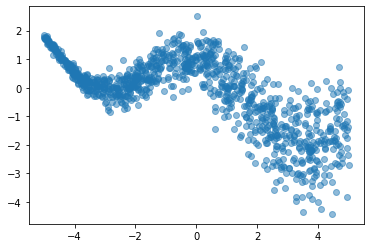

In [ ]:
x, y = generate_batch(1024)

plt.scatter(x, y, alpha=0.5);

In [ ]:
class Model(nn.Module):

  def __init__(self):
    super().__init__()

    self.ann1 = nn.Sequential(
      nn.Linear(1, 10),
      nn.Tanh(),
      nn.Linear(10, 1),
    )

    self.ann2 = nn.Sequential(
      nn.Linear(1, 10),
      nn.Tanh(),
      nn.Linear(10, 1),
    )



  def forward(self, inputs):

    return self.ann1(inputs), self.ann2(inputs)    # returns (mean, log-variance)




In [ ]:
model = Model()

In [ ]:
def criterion(outputs, targets):
  
  mu = outputs[0]
  v = torch.exp(outputs[1])

  c = torch.log(torch.sqrt(2 * np.pi * v))    # coefficient term

  f = 0.5 / v * (targets - mu)**2    # exponent term

  nll = torch.mean(c + f)    # mean log-likelihood


  return nll


In [ ]:
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
n_epochs = 5000
batch_size = 128

losses = np.zeros(n_epochs)

for i in range(n_epochs):

  x, y = generate_batch(batch_size)

  inputs = torch.from_numpy(x).float()
  targets = torch.from_numpy(y).float()

  inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)

  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses[i] = loss.item()

  if i % 1000 == 0:
    print(i, losses[i])

  loss.backward()
  optimizer.step()
  

0 2.252537965774536
1000 0.9590246677398682
2000 0.6806204915046692
3000 0.6521776914596558
4000 0.6529214978218079


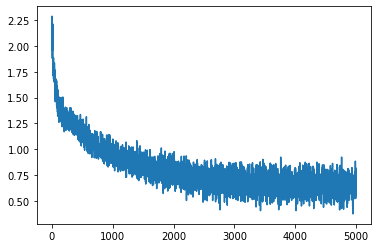

In [ ]:
plt.plot(losses);

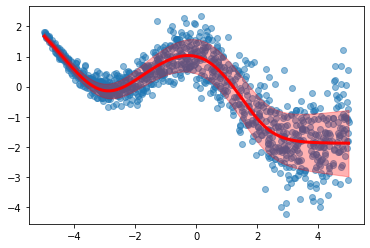

In [ ]:
x, y = generate_batch(1024)

plt.scatter(x, y, alpha=0.5)


inputs = torch.from_numpy(x).float()
targets = torch.from_numpy(y).float()

inputs, targets = inputs.view(-1, 1), targets.view(-1, 1)

with torch.no_grad():
  outputs = model(inputs)
  yhat = outputs[0].numpy().flatten()
  sd = np.exp(outputs[1].numpy().flatten() / 2) # since encoded variance by default


idx = np.argsort(x)

plt.plot(x[idx], yhat[idx], linewidth=3, color='red')
plt.fill_between(x[idx], yhat[idx] - sd[idx], yhat[idx] + sd[idx], color='red', alpha=0.3)
plt.show()
